In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv('../data/results.csv')
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [27]:
bur_cam = data[((data['home_team'] == 'Burkina Faso') & (data['away_team'] == 'Cameroon')) | (data['home_team'] == 'Cameroon') & (data['away_team'] == 'Burkina Faso')]

In [28]:
bur_cam

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
21187,1998-02-07,Burkina Faso,Cameroon,0.0,1.0,African Cup of Nations,Ouagadougou,Burkina Faso,False
21365,1998-05-19,Cameroon,Burkina Faso,2.0,0.0,Friendly,Yaoundé,Cameroon,False
22577,2000-01-11,Burkina Faso,Cameroon,2.0,2.0,Friendly,Ouagadougou,Burkina Faso,False
24627,2002-01-07,Burkina Faso,Cameroon,1.0,3.0,Friendly,Ouagadougou,Burkina Faso,False
37038,2015-06-06,Burkina Faso,Cameroon,2.0,3.0,Friendly,Colombes,France,True
38712,2017-01-14,Burkina Faso,Cameroon,1.0,1.0,African Cup of Nations,Libreville,Gabon,True
39682,2018-01-24,Burkina Faso,Cameroon,1.0,1.0,African Nations Championship,Tangiers,Morocco,True
39855,2018-05-27,Cameroon,Burkina Faso,0.0,1.0,Friendly,Beauvais,France,True


In [29]:
neutral = bur_cam[bur_cam['neutral']]
neutral

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
37038,2015-06-06,Burkina Faso,Cameroon,2.0,3.0,Friendly,Colombes,France,True
38712,2017-01-14,Burkina Faso,Cameroon,1.0,1.0,African Cup of Nations,Libreville,Gabon,True
39682,2018-01-24,Burkina Faso,Cameroon,1.0,1.0,African Nations Championship,Tangiers,Morocco,True
39855,2018-05-27,Cameroon,Burkina Faso,0.0,1.0,Friendly,Beauvais,France,True


In [30]:
friendly = bur_cam[bur_cam['tournament'] == 'Friendly']
friendly

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
21365,1998-05-19,Cameroon,Burkina Faso,2.0,0.0,Friendly,Yaoundé,Cameroon,False
22577,2000-01-11,Burkina Faso,Cameroon,2.0,2.0,Friendly,Ouagadougou,Burkina Faso,False
24627,2002-01-07,Burkina Faso,Cameroon,1.0,3.0,Friendly,Ouagadougou,Burkina Faso,False
37038,2015-06-06,Burkina Faso,Cameroon,2.0,3.0,Friendly,Colombes,France,True
39855,2018-05-27,Cameroon,Burkina Faso,0.0,1.0,Friendly,Beauvais,France,True


In [31]:
not_friendly = bur_cam[bur_cam['tournament'] != 'Friendly']
not_friendly

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
21187,1998-02-07,Burkina Faso,Cameroon,0.0,1.0,African Cup of Nations,Ouagadougou,Burkina Faso,False
38712,2017-01-14,Burkina Faso,Cameroon,1.0,1.0,African Cup of Nations,Libreville,Gabon,True
39682,2018-01-24,Burkina Faso,Cameroon,1.0,1.0,African Nations Championship,Tangiers,Morocco,True


In [32]:
afcon = bur_cam[bur_cam['tournament'] == 'African Cup of Nations']
afcon

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
21187,1998-02-07,Burkina Faso,Cameroon,0.0,1.0,African Cup of Nations,Ouagadougou,Burkina Faso,False
38712,2017-01-14,Burkina Faso,Cameroon,1.0,1.0,African Cup of Nations,Libreville,Gabon,True


In [36]:
def get_results(competition, country_A, country_B):
    win_A = 0 # country A win
    draw = 0 # draw of country_A and country_B are equal
    #lost_A = 0 # country A lost
    for i, j, k, l in zip(competition['home_team'], competition['away_team'], competition['home_score'], competition['away_score']):
        if ((i == country_A and k > l) or (j == country_A and k < l)):
            win_A += 1
        elif ((i == country_A and k == l) or (j == country_A and k == l)):
            draw += 1
    return [win_A, draw, len(competition)-(win_A + draw)]

In [37]:
all_match = get_results(bur_cam, 'Burkina Faso', 'Cameroon')
all_match

[1, 3, 4]

In [41]:
neu = get_results(neutral, 'Burkina Faso', 'Cameroon')
neu

[1, 2, 1]

In [42]:
frnd = get_results(friendly, 'Burkina Faso', 'Cameroon')
frnd

[1, 1, 3]

In [43]:
not_frnd = get_results(not_friendly, 'Burkina Faso', 'Cameroon')
not_frnd

[0, 2, 1]

In [45]:
can = get_results(afcon, 'Burkina Faso', 'Cameroon')
can

[0, 1, 1]

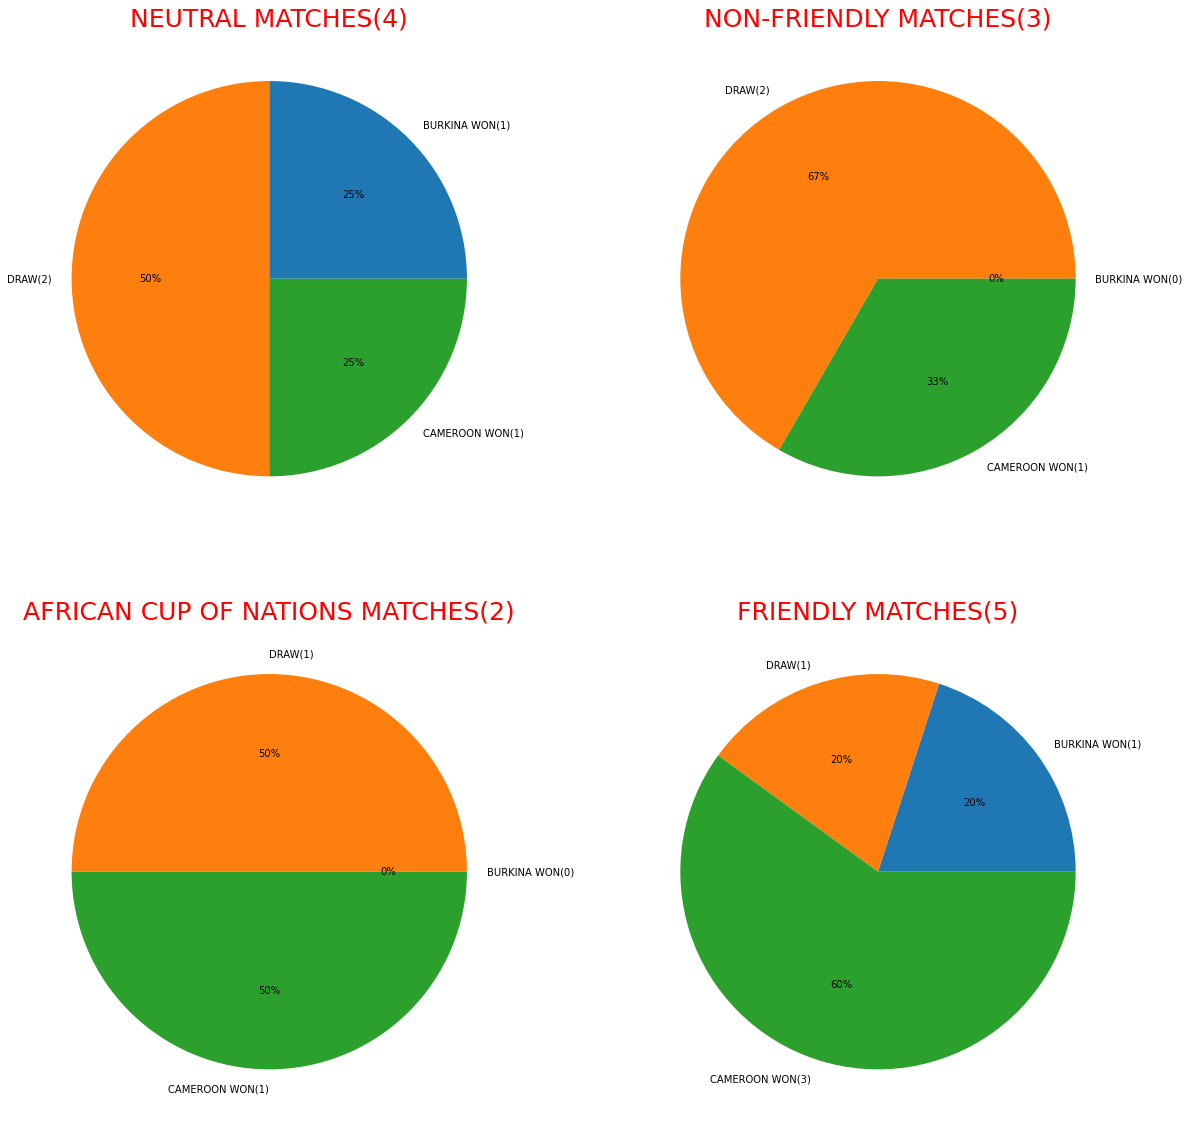

In [46]:
labels1 = [f'BURKINA WON({neu[0]})', f'DRAW({neu[1]})', f'CAMEROON WON({neu[2]})']
sizes1 = get_results(neutral, 'Burkina Faso', 'Cameroon')

labels2 = [f'BURKINA WON({not_frnd[0]})', f'DRAW({not_frnd[1]})', f'CAMEROON WON({not_frnd[2]})']
sizes2 = get_results(not_friendly, 'Burkina Faso', 'Cameroon')

labels3 = [f'BURKINA WON({can[0]})', f'DRAW({can[1]})', f'CAMEROON WON({can[2]})']
sizes3 = get_results(afcon, 'Burkina Faso', 'Cameroon')

labels4 = [f'BURKINA WON({frnd[0]})', f'DRAW({frnd[1]})', f'CAMEROON WON({frnd[2]})']
sizes4 = get_results(friendly, 'Burkina Faso', 'Cameroon')

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(nrows=2, ncols=2 , figsize=(20,20))

ax1.pie(sizes1, labels=labels1, autopct='%.0f%%')
ax2.pie(sizes2, labels=labels2, autopct='%.0f%%')
ax3.pie(sizes3, labels=labels3, autopct='%.0f%%')
ax4.pie(sizes4, labels=labels4, autopct='%.0f%%')


ax1.set_title(f'NEUTRAL MATCHES({sum(neu)})', color='r', fontsize=25)
ax2.set_title(f'NON-FRIENDLY MATCHES({sum(not_frnd)})', color='r', fontsize=25)
ax3.set_title(f'AFRICAN CUP OF NATIONS MATCHES({sum(can)})', color='r', fontsize=25)
ax4.set_title(f'FRIENDLY MATCHES({sum(frnd)})', color='r', fontsize=25)



#plt.show()
plt.savefig("images/burkina_cameroon_3rdplace1.png")

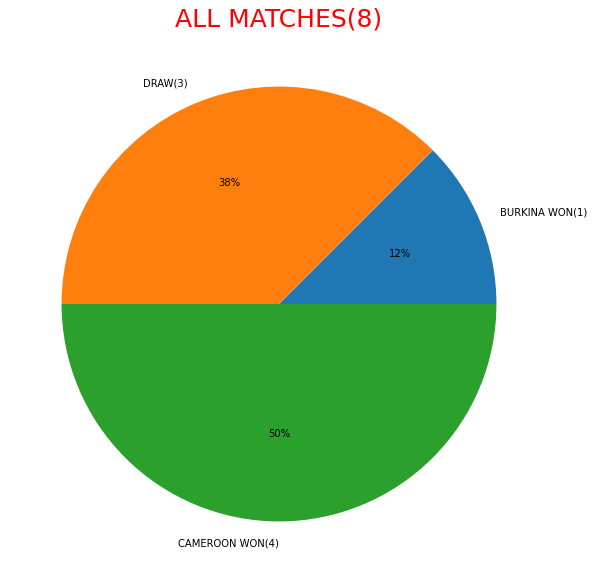

In [49]:
labels = [f'BURKINA WON({all_match[0]})', f'DRAW({all_match[1]})', f'CAMEROON WON({all_match[2]})']
sizes = get_results(bur_cam, 'Burkina Faso', 'Cameroon')

fig, ax1 = plt.subplots(figsize=(10, 10))

ax1.pie(sizes, labels=labels, autopct='%.0f%%')
ax1.set_title(f'ALL MATCHES({sum(all_match)})', color='r', fontsize=25)


#plt.show()
plt.savefig("images/burkina_cameroon_3rdplace2.png")